In [1]:
! git clone https://gitlab.com/tejas35/gtsrb.git

Cloning into 'gtsrb'...
remote: Enumerating objects: 5519, done.
remote: Counting objects: 100% (5519/5519), done.
remote: Compressing objects: 100% (5517/5517), done.
remote: Total 52105 (delta 18), reused 5453 (delta 2), pack-reused 46586
Receiving objects: 100% (52105/52105), 299.71 MiB | 37.29 MiB/s, done.
Resolving deltas: 100% (94/94), done.
Checking out files: 100% (51890/51890), done.


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt

In [0]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

In [0]:
height = 32
width = 32
channels = 3
classes = 43
n_inputs = height * width*channels

In [5]:
for i in range(classes) :
    path = "/content/gtsrb/train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" Modified")

/content/gtsrb/train/0/
/content/gtsrb/train/1/
/content/gtsrb/train/2/
/content/gtsrb/train/3/
/content/gtsrb/train/4/
/content/gtsrb/train/5/
/content/gtsrb/train/6/
/content/gtsrb/train/7/
/content/gtsrb/train/8/
/content/gtsrb/train/9/
/content/gtsrb/train/10/
/content/gtsrb/train/11/
/content/gtsrb/train/12/
/content/gtsrb/train/13/
/content/gtsrb/train/14/
/content/gtsrb/train/15/
/content/gtsrb/train/16/
/content/gtsrb/train/17/
/content/gtsrb/train/18/
/content/gtsrb/train/19/
/content/gtsrb/train/20/
/content/gtsrb/train/21/
/content/gtsrb/train/22/
/content/gtsrb/train/23/
/content/gtsrb/train/24/
/content/gtsrb/train/25/
/content/gtsrb/train/26/
/content/gtsrb/train/27/
/content/gtsrb/train/28/
/content/gtsrb/train/29/
/content/gtsrb/train/30/
/content/gtsrb/train/31/
/content/gtsrb/train/32/
/content/gtsrb/train/33/
/content/gtsrb/train/34/
/content/gtsrb/train/35/
/content/gtsrb/train/36/
/content/gtsrb/train/37/
/content/gtsrb/train/38/
/content/gtsrb/train/39/
/content/g

In [0]:
Cells=np.array(data)
labels=np.array(labels)

In [0]:
#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [0]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

In [9]:
#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D
from keras.utils import plot_model

In [0]:
#My CNN 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)         

In [0]:
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"]) 

In [14]:
#using twenty epochs for the training and saving the accuracy for each epoch
epochs = 50
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

Train on 31368 samples, validate on 7841 samples
Epoch 1/50
31368/31368 [==============================] - 14s 440us/step - loss: 1.1712 - accuracy: 0.6702 - val_loss: 0.1407 - val_accuracy: 0.9694
Epoch 2/50
31368/31368 [==============================] - 7s 229us/step - loss: 0.2209 - accuracy: 0.9333 - val_loss: 0.0519 - val_accuracy: 0.9869
Epoch 3/50
31368/31368 [==============================] - 7s 227us/step - loss: 0.1373 - accuracy: 0.9601 - val_loss: 0.0349 - val_accuracy: 0.9911
Epoch 4/50
31368/31368 [==============================] - 7s 225us/step - loss: 0.1004 - accuracy: 0.9693 - val_loss: 0.0353 - val_accuracy: 0.9913
Epoch 5/50
31368/31368 [==============================] - 7s 224us/step - loss: 0.0853 - accuracy: 0.9735 - val_loss: 0.0310 - val_accuracy: 0.9934
Epoch 6/50
31368/31368 [==============================] - 7s 225us/step - loss: 0.0722 - accuracy: 0.9779 - val_loss: 0.0262 - val_accuracy: 0.9945
Epoch 7/50
31368/31368 [==============================] - 7s 2

In [15]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [0]:
#saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

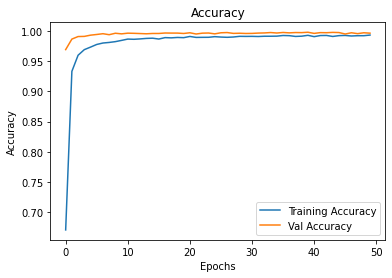

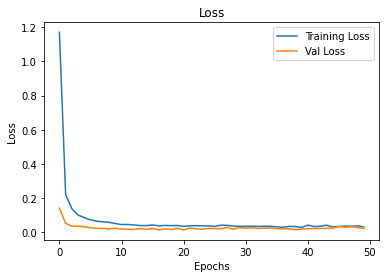

In [17]:
#Display of the accuracy and the loss values

plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')

In [0]:
from keras.models import model_from_json

In [0]:
height = 32
width = 32

In [0]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [0]:
# load weights into new model
loaded_model.load_weights("model.h5")

In [0]:
#Predicting with the test data
y_test=pd.read_csv("/content/gtsrb/Test.csv")
labels=y_test['Path'].values
y_test=y_test['ClassId'].values

In [0]:
data=[]

In [0]:
for f in labels:
    image=cv2.imread('/content/gtsrb/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

In [0]:
X_test=np.array(data)
X_test = X_test.astype('float32')/255
pred = loaded_model.predict_classes(X_test)

In [26]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9755344418052256
